# Individual analysis: Alexis Mac Allister - FIFA World Cup Final 2022

In [113]:
# Import the necessary libraries
from statsbombpy import sb
import pandas as pd
from mplsoccer import VerticalPitch,Pitch
from highlight_text import ax_text, fig_text
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np

## Exploratory Data Analysis (EDA)

In [114]:
wc22 = sb.matches(43,106)
wc22_arg = wc22[(wc22['home_team']=='Argentina')|(wc22['away_team']=='Argentina')]
wc22_arg.sort_values('match_date')

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
37,3857300,2022-11-22,12:00:00.000,International - FIFA World Cup,2022,Argentina,Saudi Arabia,1,2,available,...,2023-06-19T15:59:46.628887,1,Group Stage,Lusail Stadium,Slavko Vinčić,Lionel Sebastián Scaloni,Hervé Renard,1.1.0,2,2
13,3857289,2022-11-26,21:00:00.000,International - FIFA World Cup,2022,Argentina,Mexico,2,0,available,...,2023-06-20T11:57:08.547882,2,Group Stage,Lusail Stadium,Daniele Orsato,Lionel Sebastián Scaloni,Gerardo Daniel Martino,1.1.0,2,2
11,3857264,2022-11-30,21:00:00.000,International - FIFA World Cup,2022,Poland,Argentina,0,2,available,...,2023-07-25T09:10:13.832053,3,Group Stage,Stadium 974,Danny Desmond Makkelie,Czesław Michniewicz,Lionel Sebastián Scaloni,1.1.0,2,2
1,3869151,2022-12-03,21:00:00.000,International - FIFA World Cup,2022,Argentina,Australia,2,1,available,...,2023-07-30T07:48:51.865595,4,Round of 16,Ahmad bin Ali Stadium,Szymon Marciniak,Lionel Sebastián Scaloni,Graham James Arnold,1.1.0,2,2
6,3869321,2022-12-09,21:00:00.000,International - FIFA World Cup,2022,Netherlands,Argentina,2,2,available,...,2023-06-21T17:51:12.511460,5,Quarter-finals,Lusail Stadium,Antonio Miguel Mateu Lahoz,Louis van Gaal,Lionel Sebastián Scaloni,1.1.0,2,2
19,3869519,2022-12-13,21:00:00.000,International - FIFA World Cup,2022,Argentina,Croatia,3,0,available,...,2023-04-26T22:32:37.808359,6,Semi-finals,Lusail Stadium,Daniele Orsato,Lionel Sebastián Scaloni,Zlatko Dalić,1.1.0,2,2
9,3869685,2022-12-18,17:00:00.000,International - FIFA World Cup,2022,Argentina,France,3,3,available,...,2023-08-17T15:55:15.164685,7,Final,Lusail Stadium,Szymon Marciniak,Lionel Sebastián Scaloni,Didier Deschamps,1.1.0,2,2


In [115]:
# Filter only the final match and all the events Mac Allister was involved in
final22 = sb.events(match_id=3869685)
amc = final22[final22['player']=='Alexis Mac Allister']

In [116]:
amc.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_offensive', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_other', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive',
       'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'interception_outcome', 'location', 'match_id', 'minute', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id'

In [117]:
sb.events(match_id=3869685, split=True, flatten_attrs=False).keys()

dict_keys(['starting_xis', 'half_starts', 'passes', 'ball_receipts', 'carrys', 'pressures', 'foul_committeds', 'foul_wons', 'ball_recoverys', 'blocks', 'miscontrols', 'clearances', 'duels', 'interceptions', 'dribbles', 'shots', 'goal_keepers', 'dispossesseds', 'dribbled_pasts', 'injury_stoppages', 'player_offs', 'player_ons', 'offsides', 'substitutions', 'tactical_shifts', 'shields', '50/50s', 'half_ends', 'bad_behaviours'])

In [118]:
final22_keys = sb.events(match_id=3869685, split=True, flatten_attrs=False)
final22_keys['duels']

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,location,duration,under_pressure,related_events,duel,match_id,possession_team_id,team_id,player_id,counterpress
0,2caddad5-aa57-4afc-85d9-2ba269efa321,105,1,00:03:04.933,3,4,Duel,9,France,From Free Kick,...,"[52.3, 19.4]",0.0,True,[5288bf75-ec36-47bc-a8e4-9568b39ddb0c],"{'type': {'id': 10, 'name': 'Aerial Lost'}}",3869685,771,779,27886,NaN
1,c3c5e08d-cfad-41a3-8cdd-ae359522fff4,156,1,00:04:08.181,4,8,Duel,11,Argentina,From Free Kick,...,"[11.2, 75.2]",0.0,True,[13643507-1bd3-46bc-bba0-06beb5e7c5ae],"{'type': {'id': 11, 'name': 'Tackle'}, 'outcom...",3869685,779,771,4445,NaN
2,1942474b-958a-4b56-b989-45a5f63e4f71,200,1,00:04:53.230,4,53,Duel,15,France,From Keeper,...,"[57.4, 44.9]",0.0,True,[2ff8de78-7015-4416-a2e4-d17d5980f43c],"{'type': {'id': 11, 'name': 'Tackle'}, 'outcom...",3869685,771,771,5487,True
3,c6286bd5-028c-4630-982e-741e07ea10b7,330,1,00:07:27.325,7,27,Duel,18,Argentina,Regular Play,...,"[89.0, 24.1]",0.0,True,[849c89a5-dc01-4f18-a486-8748d917bdb8],"{'type': {'id': 11, 'name': 'Tackle'}, 'outcom...",3869685,779,779,38718,True
4,233ca418-b3a0-4140-b832-1e8ead533693,349,1,00:08:29.673,8,29,Duel,19,Argentina,From Corner,...,"[9.5, 7.2]",0.0,True,[72426e5a-996a-4ee2-91d6-3a95877aacc7],"{'type': {'id': 11, 'name': 'Tackle'}, 'outcom...",3869685,779,771,5487,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0018bfad-064a-47cb-8577-09b5dd716425,4253,4,00:14:07.532,119,7,Duel,240,Argentina,From Corner,...,"[112.3, 40.0]",0.0,True,[e7fe9567-7a62-48cd-90b6-fc28dc8448e5],"{'type': {'id': 10, 'name': 'Aerial Lost'}}",3869685,779,779,3090,NaN
94,b8ec6d00-e6c4-443b-a480-f37a79bc0056,4259,4,00:14:23.239,119,23,Duel,242,France,Regular Play,...,"[21.5, 6.1]",0.0,True,[b91c899e-1bd7-4b2f-8cc4-49a7428e5b91],"{'type': {'id': 11, 'name': 'Tackle'}, 'outcom...",3869685,771,771,24778,True
95,b941d97d-b2d7-482f-896c-8527ab99b37f,4311,4,00:16:44.591,121,44,Duel,244,Argentina,From Throw In,...,"[62.7, 68.2]",0.0,True,[6a02a34a-4f78-41d2-91c5-f6c401521c43],"{'type': {'id': 11, 'name': 'Tackle'}, 'outcom...",3869685,779,771,8217,NaN
96,bef5595d-614f-4c66-9f64-8b5fb4e80995,4332,4,00:17:38.028,122,38,Duel,245,France,From Free Kick,...,"[85.0, 53.2]",0.0,True,[182ecf1e-3385-4991-9497-635e371ad70d],"{'type': {'id': 10, 'name': 'Aerial Lost'}}",3869685,771,771,22097,NaN


In [119]:
final22['type'].unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Foul Committed', 'Foul Won', 'Ball Recovery', 'Block',
       'Miscontrol', 'Clearance', 'Duel', 'Interception', 'Dribble',
       'Shot', 'Goal Keeper', 'Dispossessed', 'Dribbled Past',
       'Injury Stoppage', 'Player Off', 'Player On', 'Offside',
       'Substitution', 'Tactical Shift', 'Shield', '50/50', 'Half End',
       'Bad Behaviour'], dtype=object)

In [120]:
# Rename players
name_map = {
    'Lionel Andrés Messi Cuccittini': 'Lionel Messi',
    'Nicolás Alejandro Tagliafico': 'Nicolás Tagliafico',
    'Cristian Gabriel Romero': 'Cristian Romero',
    'Rodrigo Javier De Paul': 'Rodrigo De Paul',
    'Marcos Javier Acuña': 'Marcos Acuña',
    'Kylian Mbappé Lottin': 'Kylian Mbappé',
    'Theo Bernard François Hernández': 'Theo Hernández',
    'Leandro Daniel Paredes': 'Leandro Paredes',
    'Gonzalo Ariel Montiel': 'Gonzalo Montiel',
    'Ángel Fabián Di María Hernández': 'Ángel Di María',
    'Nicolás Hernán Otamendi': 'Nicolás Otamendi',
    'Lautaro Javier Martínez': 'Lautaro Martínez',
    'Damián Emiliano Martínez': 'Emiliano Martínez',
    'Paulo Bruno Exequiel Dybala': 'Paulo Dybala',
    'Germán Alejandro Pezzella': 'Germán Pezzella',
    'Aurélien Djani Tchouaméni': 'Aurélien Tchouaméni'
}

final22['player'] = final22['player'].replace(name_map)
final22['pass_recipient'] = final22['pass_recipient'].replace(name_map)

In [121]:
final22['player'].unique()

array([nan, 'Antoine Griezmann', 'Aurélien Tchouaméni',
       'Nahuel Molina Lucero', 'Rodrigo De Paul', 'Cristian Romero',
       'Nicolás Otamendi', 'Nicolás Tagliafico', 'Emiliano Martínez',
       'Theo Hernández', 'Adrien Rabiot', 'Raphaël Varane',
       'Jules Koundé', 'Alexis Mac Allister', 'Lionel Messi',
       'Ángel Di María', 'Hugo Lloris', 'Olivier Giroud',
       'Enzo Fernandez', 'Kylian Mbappé', 'Ousmane Dembélé',
       'Julián Álvarez', 'Dayotchanculle Upamecano', 'Randal Kolo Muani',
       'Marcus Thuram', 'Marcos Acuña', 'Eduardo Camavinga',
       'Kingsley Coman', 'Gonzalo Montiel', 'Youssouf Fofana',
       'Leandro Paredes', 'Lautaro Martínez', 'Ibrahima Konaté',
       'Paulo Dybala', 'Germán Pezzella'], dtype=object)

## Offensive analysis

### Total passes and passes to the last 3rd

In [122]:
# Filter only passes
argentina_francia = final22
pases = argentina_francia[argentina_francia['type']=='Pass']

In [123]:
# Separating the pass column location into coordinates
pases[['x', 'y']] = pases['location'].apply(pd.Series)
pases[['pass_end_x', 'pass_end_y']] = pases['pass_end_location'].apply(pd.Series)

#Separating Argentina's and France's passes
pases_argentina=pases[(pases["team"]=='Argentina')]
pases_francia = pases[(pases["team"]=='France')]

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17816\2780104996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pases[['x', 'y']] = pases['location'].apply(pd.Series)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_17816\2780104996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pases[['x', 'y']] = pases['location'].apply(pd.Series)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_17816\2780104996.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [124]:
# Separating between complete and incomplete passes
pases_argentina=pases[(pases["team"]=='Argentina')]
pases_totales = pases_argentina.groupby(['player'])['player'].count().to_frame()
completos = pases_argentina[pases_argentina['pass_outcome'].isnull()]
incompletos = pases_argentina[pases_argentina['pass_outcome'].notnull()]


# Counting both complete and incomplete passes by player
pases_totales['completos'] = completos.groupby(['player'])['player'].count().to_frame()
pases_totales['incompletos'] = incompletos.groupby(['player'])['player'].count().to_frame()
pases_totales = pases_totales.fillna(0)
pases_totales

,player,completos,incompletos
player,,,
Alexis Mac Allister,52,45,7.0
Cristian Romero,71,60,11.0
Emiliano Martínez,33,18,15.0
Enzo Fernandez,94,79,15.0
Germán Pezzella,1,1,0.0
Gonzalo Montiel,13,8,5.0
Julián Álvarez,32,26,6.0
Lautaro Martínez,7,5,2.0
Leandro Paredes,15,15,0.0


In [125]:
# Total passes with accuracy percentage
pases_totales = pases_totales.rename(columns={'player' : 'pases totales'})
pases_totales = pases_totales.reset_index()
pases_totales['Porcentaje %'] = pases_totales['completos']/pases_totales['pases totales']*100
pases_totales = pases_totales[pases_totales['pases totales']>=10]
pases_totales

,player,pases totales,completos,incompletos,Porcentaje %
0,Alexis Mac Allister,52,45,7.0,86.538462
1,Cristian Romero,71,60,11.0,84.507042
2,Emiliano Martínez,33,18,15.0,54.545455
3,Enzo Fernandez,94,79,15.0,84.042553
5,Gonzalo Montiel,13,8,5.0,61.538462
6,Julián Álvarez,32,26,6.0,81.250000
8,Leandro Paredes,15,15,0.0,100.000000
9,Lionel Messi,60,49,11.0,81.666667
10,Marcos Acuña,28,19,9.0,67.857143
11,Nahuel Molina Lucero,56,39,17.0,69.642857


In [126]:
# Rename players with the predefined map
pases_totales['player'] = pases_totales['player'].replace(name_map)

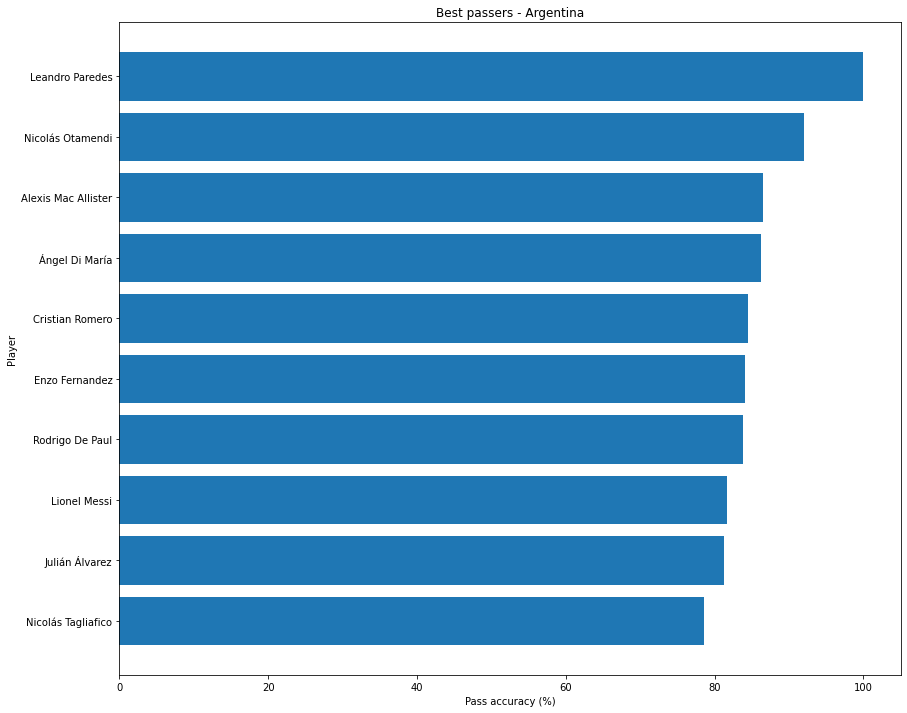

In [127]:
top_10_porcentaje = pases_totales.sort_values('Porcentaje %', ascending = True).tail(10)
#Puedes cambiar a gráfica vertical utilizando ax.bar en lugar de as.barh (intentalo!)
fig = plt.figure(figsize=(14, 12))
ax = plt.axes()
ax.barh(top_10_porcentaje['player'],
top_10_porcentaje['Porcentaje %'])
plt.title("Best passers - Argentina")
plt.xlabel("Pass accuracy (%)")
plt.ylabel("Player")
plt.show()

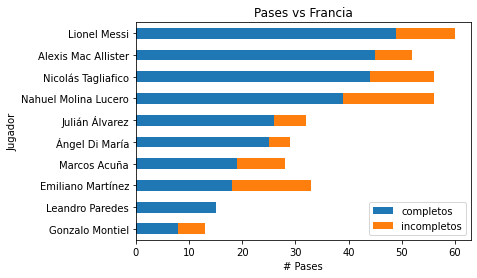

In [128]:
#stacked bar chart
ax = pases_totales[['player','completos','incompletos']].sort_values('completos',
ascending = True).head(10).plot.barh(x='player',stacked=True)
plt.title("Pases vs Francia")
plt.xlabel("# Pases")
plt.ylabel("Jugador")
plt.show()

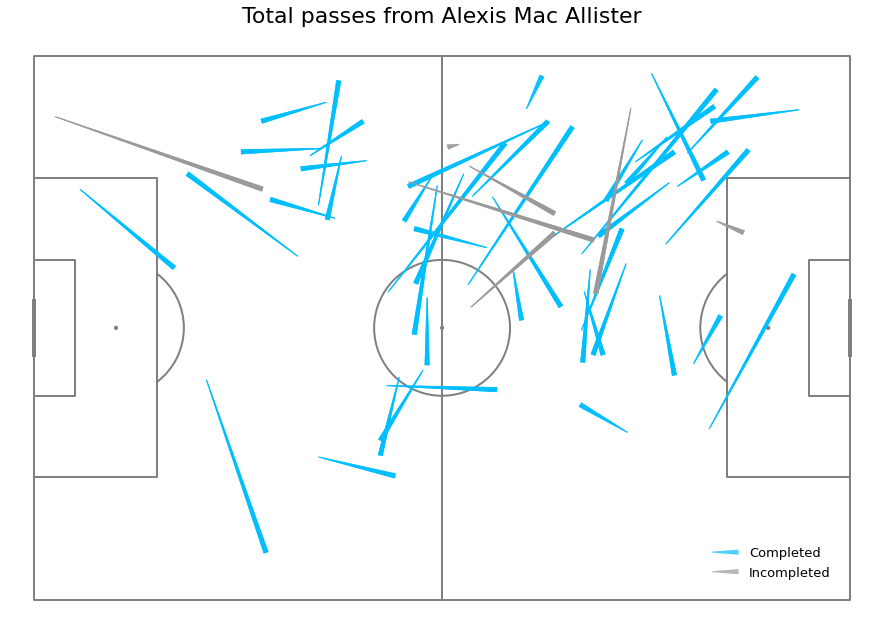

In [129]:
# Field chart of passes - Alexis Mac Allister
white="white"
sbred='#e21017'
lightgrey="#d9d9d9"
darkgrey='#9A9A9A'
cmaplist = [white, darkgrey, sbred]
cmap = LinearSegmentedColormap.from_list("", cmaplist)


def passMap(player):

    player=player
    comp=completos[(completos["player"]==player)]
    incomp=incompletos[(incompletos["player"]==player)]

    pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='grey',line_zorder=2)

    fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
    fig.set_facecolor('white')

    # Pass arrows
    pitch.lines(comp.x, comp.y,
    comp.pass_end_x, comp.pass_end_y, color='deepskyblue', ax=ax, label = "Completed",comet= True)
    pitch.lines(incomp.x, incomp.y,
    incomp.pass_end_x, incomp.pass_end_y, color=darkgrey, ax=ax, label = "Incompleted",comet= True)

    # Color labels
    ax.legend(facecolor='white', handlelength=2, edgecolor='None', fontsize=13, loc='lower right',
             bbox_to_anchor=(0.47, 0.06, 0.49, 0.5))

    #Title 
    ax_title = ax.set_title('Total passes from ' f'{player}', fontsize=22,color='black')
    plt.show()
passMap('Alexis Mac Allister')

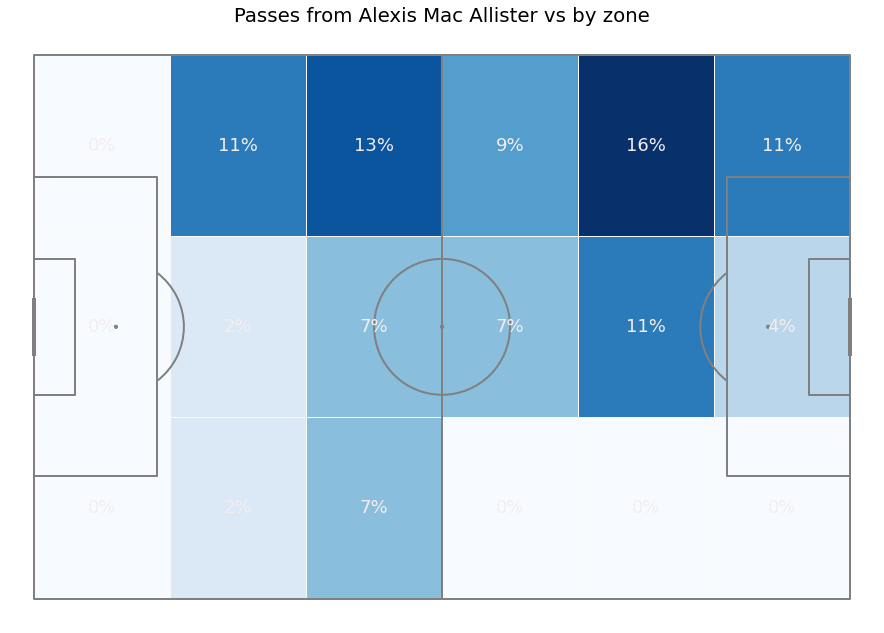

In [130]:
# Pass distribution
def passMap2(player):

    player=player
    #Filtrando los pases solo del jugador seleccionado
    comp=completos[(completos["player"]==player)]
    incomp=incompletos[(incompletos["player"]==player)]

    #dibujando el campo de fútbol
    pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='grey',line_zorder=2)

    fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
    fig.set_facecolor('white')
    bin_x = np.linspace(pitch.dim.left, pitch.dim.right, num=7)
    bin_y = np.sort(np.array([pitch.dim.bottom, pitch.dim.six_yard_bottom,
                              pitch.dim.six_yard_top, pitch.dim.top]))
    bin_statistic = pitch.bin_statistic(comp.pass_end_x, comp.pass_end_y, statistic='count', bins=(6,3), normalize=True)
    pitch.heatmap(bin_statistic, ax=ax, cmap='Blues', edgecolor='#f9f9f9')
    labels2 = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                                  ax=ax, ha='center', va='center',
                                  str_format='{:.0%}')
    ax_title = ax.set_title('Passes from ' f'{player} vs by zone', fontsize=19.7,color='black')
    plt.show()
passMap2('Alexis Mac Allister')

In [131]:
# Passes to last 3rd
complete_f3 = completos[(completos["pass_end_x"]>=80)]
incomplete_f3 = incompletos[(incompletos["pass_end_x"]>=80)]

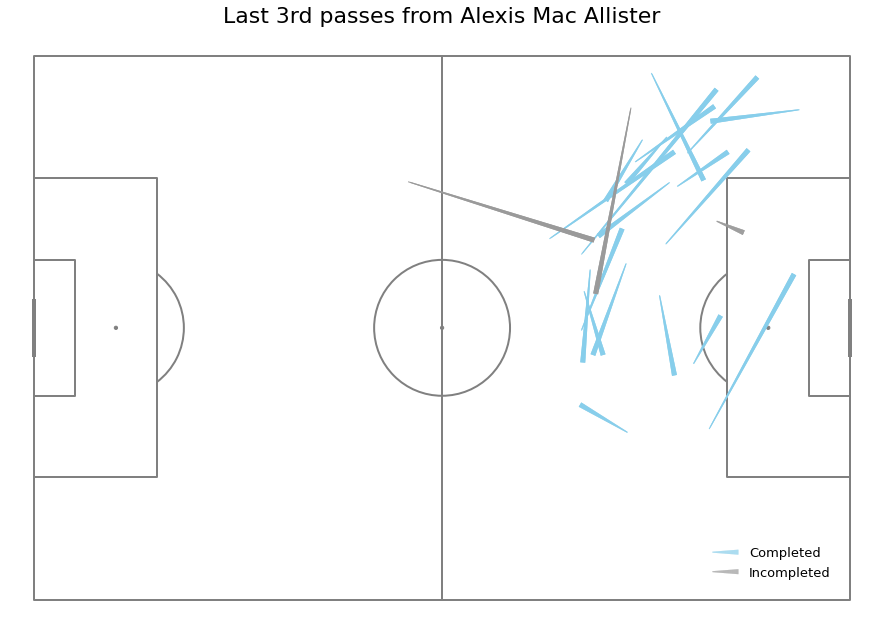

In [132]:
white="white"
sbred='#e21017'
lightgrey="#d9d9d9"
darkgrey='#9A9A9A'
cmaplist = [white, darkgrey, sbred]
cmap = LinearSegmentedColormap.from_list("", cmaplist)


def passMap(player):

    player=player
    comp=completos[(completos["player"]==player)]
    incomp=incompletos[(incompletos["player"]==player)]
    complete_f3 = comp[(completos["pass_end_x"]>=80)]
    incomplete_f3 = incomp[(incompletos["pass_end_x"]>=80)]
    
    pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='grey',line_zorder=2)

    fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
    fig.set_facecolor('white')

    # Arrows
    pitch.lines(complete_f3.x, complete_f3.y,
    complete_f3.pass_end_x, complete_f3.pass_end_y, color='skyblue', ax=ax, label = "Completed",comet= True)
    pitch.lines(incomplete_f3.x, incomplete_f3.y,
    incomplete_f3.pass_end_x, incomplete_f3.pass_end_y, color=darkgrey, ax=ax, label = "Incompleted",comet= True)

    # Color labels
    ax.legend(facecolor='white', handlelength=2, edgecolor='None', fontsize=13, loc='lower right',
             bbox_to_anchor=(0.47, 0.06, 0.49, 0.5))

    # Title
    ax_title = ax.set_title('Last 3rd passes from ' f'{player}', fontsize=22,color='black')
    plt.show()
passMap('Alexis Mac Allister')

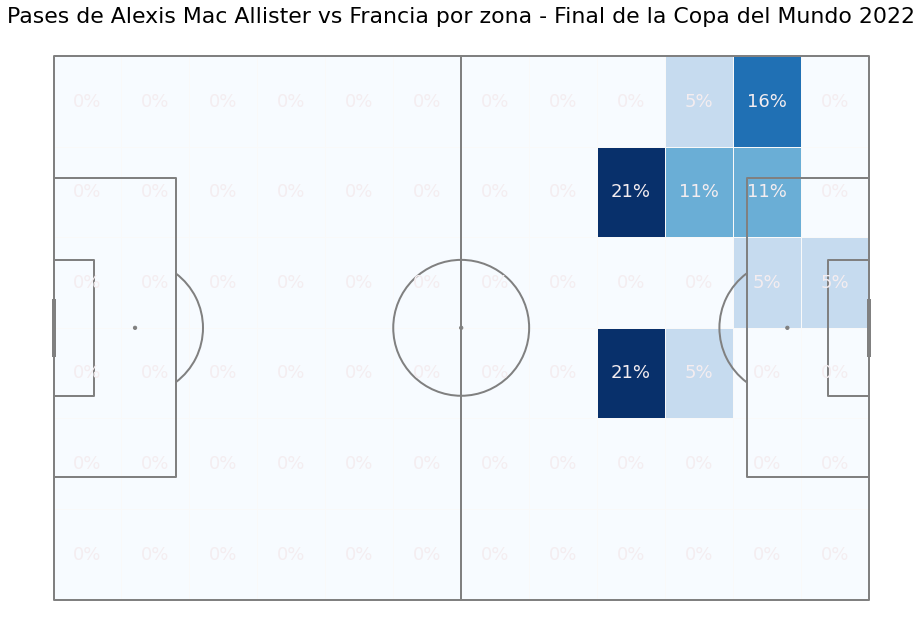

In [133]:
def passMap2(player):

    player=player
    comp=completos[(completos["player"]==player)]
    incomp=incompletos[(incompletos["player"]==player)]    
    complete_f3 = comp[(completos["pass_end_x"]>=80)]
    incomplete_f3 = incomp[(incompletos["pass_end_x"]>=80)]

    pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='grey',line_zorder=2)

    fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
    fig.set_facecolor('white')
    bin_x = np.linspace(pitch.dim.left, pitch.dim.right, num=7)
    bin_y = np.sort(np.array([pitch.dim.bottom, pitch.dim.six_yard_bottom,
                              pitch.dim.six_yard_top, pitch.dim.top]))
    bin_statistic = pitch.bin_statistic(complete_f3.pass_end_x, complete_f3.pass_end_y, statistic='count', bins=(12,6), normalize=True)
    pitch.heatmap(bin_statistic, ax=ax, cmap='Blues', edgecolor='#f9f9f9')
    labels2 = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                                  ax=ax, ha='center', va='center',
                                  str_format='{:.0%}')
    ax_title = ax.set_title('Pases de ' f'{player} vs Francia por zona - Final de la Copa del Mundo 2022', fontsize=22,color='black')
    plt.show()
passMap2('Alexis Mac Allister')

In [134]:
# Passes to last 3rd - Team comparison
completos_u3 = pases_argentina[(pases_argentina['pass_outcome'].isnull())&(pases_argentina['pass_end_x']>=80)]
incompletos_u3 = pases_argentina[(pases_argentina['pass_outcome'].notnull())&((pases_argentina['pass_end_x']>=80))]

In [135]:
pases_argentina_u3 =pases[(pases["team"]=='Argentina')&(pases['pass_end_x']>=80)]
pases_totales_u3 = pases_argentina_u3.groupby(['player'])['player'].count().to_frame()
completos_u3 = pases_argentina_u3[pases_argentina_u3['pass_outcome'].isnull()]
incompletos_u3 = pases_argentina_u3[pases_argentina_u3['pass_outcome'].notnull()]


pases_totales_u3['completos'] = completos_u3.groupby(['player'])['player'].count().to_frame()
pases_totales_u3['incompletos'] = incompletos_u3.groupby(['player'])['player'].count().to_frame()
pases_totales_u3 = pases_totales_u3.fillna(0)
pases_totales_u3

,player,completos,incompletos
player,,,
Alexis Mac Allister,22,19.0,3.0
Cristian Romero,6,3.0,3.0
Emiliano Martínez,6,0.0,6.0
Enzo Fernandez,23,16.0,7.0
Gonzalo Montiel,5,3.0,2.0
Julián Álvarez,17,13.0,4.0
Lautaro Martínez,3,2.0,1.0
Leandro Paredes,4,4.0,0.0
Lionel Messi,38,29.0,9.0


In [136]:
# Passes to final 3rd accuracy
pases_totales_u3 = pases_totales_u3.rename(columns={'player' : 'pases totales'})
pases_totales_u3['Porcentaje %'] = pases_totales_u3['completos']/pases_totales_u3['pases totales']*100
pases_totales_u3 = pases_totales_u3[pases_totales_u3['pases totales']>=7]
pases_totales_u3 = pases_totales_u3.reset_index()
pases_totales_u3

,player,pases totales,completos,incompletos,Porcentaje %
0,Alexis Mac Allister,22,19.0,3.0,86.363636
1,Enzo Fernandez,23,16.0,7.0,69.565217
2,Julián Álvarez,17,13.0,4.0,76.470588
3,Lionel Messi,38,29.0,9.0,76.315789
4,Marcos Acuña,16,10.0,6.0,62.500000
5,Nahuel Molina Lucero,17,9.0,8.0,52.941176
6,Nicolás Tagliafico,20,13.0,7.0,65.000000
7,Rodrigo De Paul,19,12.0,7.0,63.157895
8,Ángel Di María,15,12.0,3.0,80.000000


In [137]:
# France's passes to final 3rd accuracy
pases_francia_u3 =pases[(pases["team"]=='France')&(pases['pass_end_x']>=80)]
pases_totales_fr_u3 = pases_francia_u3.groupby(['player'])['player'].count().to_frame()
completos_fr_u3 = pases_francia_u3[pases_francia_u3['pass_outcome'].isnull()]
incompletos_fr_u3 = pases_francia_u3[pases_francia_u3['pass_outcome'].notnull()]

pases_totales_fr_u3['completos'] = completos_fr_u3.groupby(['player'])['player'].count().to_frame()
pases_totales_fr_u3['incompletos'] = incompletos_fr_u3.groupby(['player'])['player'].count().to_frame()
pases_totales_fr_u3 = pases_totales_fr_u3.fillna(0)

pases_totales_fr_u3 = pases_totales_fr_u3.rename(columns={'player' : 'pases totales'})
pases_totales_fr_u3['Porcentaje %'] = pases_totales_fr_u3['completos']/pases_totales_fr_u3['pases totales']*100
pases_totales_fr_u3 = pases_totales_fr_u3[pases_totales_fr_u3['pases totales']>=7]
pases_totales_fr_u3 = pases_totales_fr_u3.reset_index()
pases_totales_fr_u3

,player,pases totales,completos,incompletos,Porcentaje %
0,Adrien Rabiot,16,12.0,4.0,75.000000
1,Antoine Griezmann,13,8.0,5.0,61.538462
2,Aurélien Tchouaméni,15,9.0,6.0,60.000000
3,Dayotchanculle Upamecano,11,2.0,9.0,18.181818
4,Hugo Lloris,11,2.0,9.0,18.181818
5,Jules Koundé,13,9.0,4.0,69.230769
6,Kingsley Coman,7,0.0,7.0,0.000000
7,Kylian Mbappé,19,12.0,7.0,63.157895
8,Marcus Thuram,9,4.0,5.0,44.444444
9,Randal Kolo Muani,9,7.0,2.0,77.777778


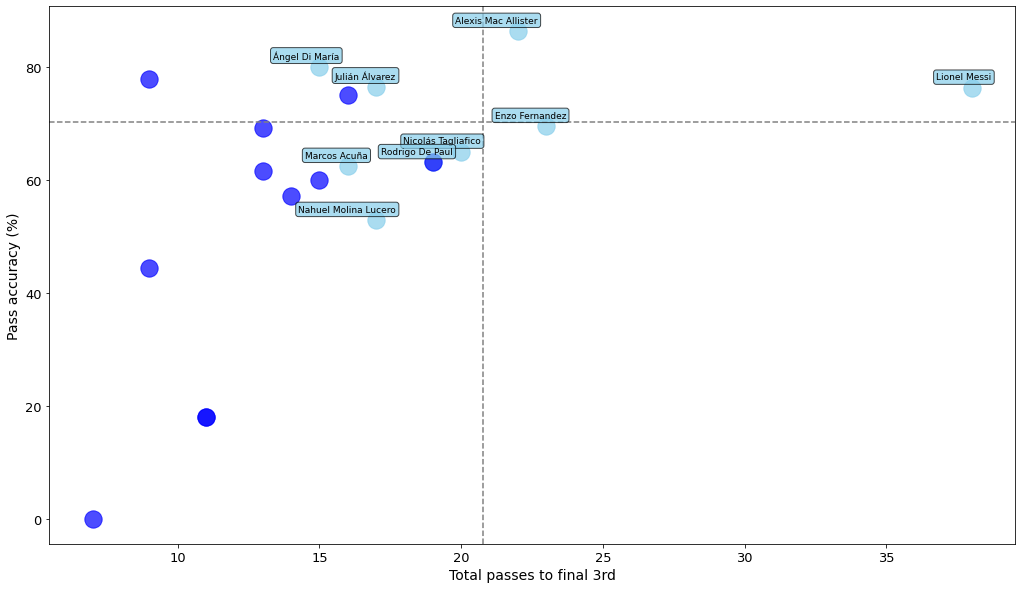

In [139]:
jugadores_arg = list(pases_totales_u3['player'])
jugadores_fra = list(pases_totales_fr_u3['player'])

fig, ax = plt.subplots(figsize=(14,8))
scatter = ax.scatter(data=pases_totales_u3, x="pases totales", y="Porcentaje %",alpha=0.7,s=300,c='skyblue')
scatter = ax.scatter(data=pases_totales_fr_u3, x="pases totales", y="Porcentaje %",alpha=0.7,s=300,c='blue')

for i, jugador in enumerate(jugadores_arg):
    bbox_color = 'skyblue' if jugador in jugadores_arg else 'blue'
    ax.annotate(jugador, (pases_totales_u3['pases totales'][i], pases_totales_u3['Porcentaje %'][i]), 
                fontsize=9, ha='right', color='black',
                bbox=dict(boxstyle='round', facecolor=bbox_color, alpha=0.7), xytext=(20,8), textcoords='offset points')
    
plt.tight_layout()
plt.axhline(y = pases_totales_u3['Porcentaje %'].mean(), color = 'grey', linestyle = 'dashed') 
plt.axvline(x = pases_totales_u3['pases totales'].mean(), color = 'grey', linestyle = 'dashed') 
plt.xlabel('Total passes to final 3rd',fontsize=14)
plt.ylabel('Pass accuracy (%)', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

## Deffensive analysis

### Recoveries

In [34]:
final22[(final22['type']=='Ball Recovery')].columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_offensive', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_other', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive',
       'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'interception_outcome', 'location', 'match_id', 'minute', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id'

In [35]:
# Most recoveries - overall
recuperaciones = final22[(final22['type']=='Ball Recovery')].value_counts('player').to_frame()
recuperaciones = recuperaciones.rename(columns={0 : 'recuperaciones'})
recuperaciones = recuperaciones.reset_index()
recuperaciones.head()

,player,count
0,Aurélien Tchouaméni,10
1,Alexis Mac Allister,9
2,Enzo Fernandez,8
3,Kylian Mbappé,7
4,Lionel Messi,7


In [36]:
final22[(final22['type']=='Interception')].value_counts('player')

player
Aurélien Tchouaméni         5
Adrien Rabiot               3
Antoine Griezmann           2
Cristian Romero             2
Julián Álvarez              2
Nicolás Tagliafico          2
Raphaël Varane              2
Rodrigo De Paul             2
Ángel Di María              2
Dayotchanculle Upamecano    1
Enzo Fernandez              1
Ibrahima Konaté             1
Jules Koundé                1
Nahuel Molina Lucero        1
Nicolás Otamendi            1
Name: count, dtype: int64

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17816\967360117.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recup[['x', 'y']] = recup['location'].apply(pd.Series)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_17816\967360117.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recup[['x', 'y']] = recup['location'].apply(pd.Series)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_17816\967360117.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

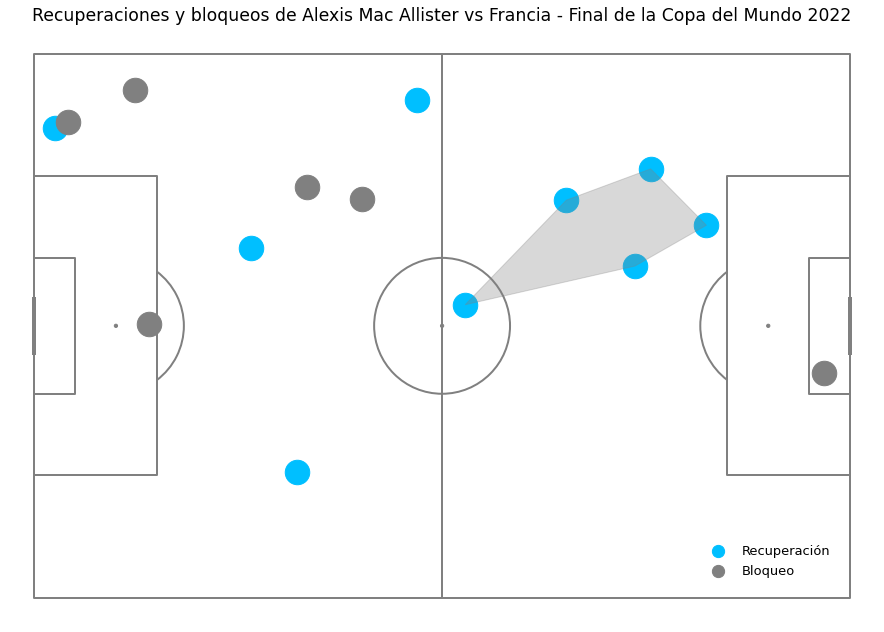

In [37]:
def recuperaciones1(player):

    player=player
    recup=final22[(final22["player"]==player)&(final22['type']=='Ball Recovery')]
    recup[['x', 'y']] = recup['location'].apply(pd.Series)
    block = final22[(final22["player"]==player)&(final22['type']=='Block')]
    block[['x', 'y']] = block['location'].apply(pd.Series)

    pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='grey',line_zorder=2)

    fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
    fig.set_facecolor('white')
    pitch.scatter(x = recup['x'], y = recup['y'], ax=ax,s=600,c='deepskyblue',label='Recovery')
    pitch.scatter(x = block['x'], y = block['y'], ax=ax,s=600,c='grey',label='Block')    
    polygon_points = [(63.4, 36.9), (78.3, 21.5), (90.7,16.9),(98.9,25.2),(88.4, 31.2) ]

    plt.fill(*zip(*polygon_points), color='gray', alpha=0.3)
    
    ax_title = ax.set_title('Recoveries and blocks from ' f'{player}', fontsize=17.3,color='black')
    plt.legend(facecolor='white', handlelength=2, edgecolor='None', fontsize=13, loc='lower right',
             bbox_to_anchor=(0.47, 0.06, 0.49, 0.5),markerscale=0.5)    
    plt.show()
recuperaciones1('Alexis Mac Allister')

In [38]:
recup=final22[(final22["player"]=='Alexis Mac Allister')&(final22['type']=='Ball Recovery')]
recup[['x', 'y']] = recup['location'].apply(pd.Series)
recup[['x','y']].value_counts()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17816\135718218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recup[['x', 'y']] = recup['location'].apply(pd.Series)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_17816\135718218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recup[['x', 'y']] = recup['location'].apply(pd.Series)


x     y   
3.0   10.9    1
31.9  28.6    1
38.6  61.5    1
56.3  6.8     1
63.4  36.9    1
78.3  21.5    1
88.4  31.2    1
90.7  16.9    1
98.9  25.2    1
Name: count, dtype: int64

### Blocks

In [39]:
bloqueos = final22[(final22['type']=='Block')].value_counts('player').to_frame()
bloqueos = bloqueos.rename(columns={0 : 'bloqueos'})
bloqueos = bloqueos.reset_index()
bloqueos.head()

,player,count
0,Alexis Mac Allister,6
1,Cristian Romero,4
2,Adrien Rabiot,3
3,Kingsley Coman,3
4,Dayotchanculle Upamecano,3


In [40]:
final22.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_offensive', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_other', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive',
       'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'interception_outcome', 'location', 'match_id', 'minute', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id'

In [41]:
final22['type'].unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Foul Committed', 'Foul Won', 'Ball Recovery', 'Block',
       'Miscontrol', 'Clearance', 'Duel', 'Interception', 'Dribble',
       'Shot', 'Goal Keeper', 'Dispossessed', 'Dribbled Past',
       'Injury Stoppage', 'Player Off', 'Player On', 'Offside',
       'Substitution', 'Tactical Shift', 'Shield', '50/50', 'Half End',
       'Bad Behaviour'], dtype=object)

## Possesion

### Fouls generated

In [42]:
fouls_won = final22[(final22['type']=='Foul Won')].value_counts('player').to_frame()
fouls_won = fouls_won.rename(columns={0 : 'bloqueos'})
fouls_won = fouls_won.reset_index()
fouls_won.head(8)

,player,count
0,Rodrigo De Paul,6
1,Adrien Rabiot,4
2,Randal Kolo Muani,4
3,Kingsley Coman,3
4,Theo Hernández,3
5,Alexis Mac Allister,3
6,Ángel Di María,3
7,Eduardo Camavinga,3


### Pass reception

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17816\1638405181.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recep[['pass_end_x', 'pass_end_y']] = recep['pass_end_location'].apply(pd.Series)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_17816\1638405181.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recep[['pass_end_x', 'pass_end_y']] = recep['pass_end_location'].apply(pd.Series)


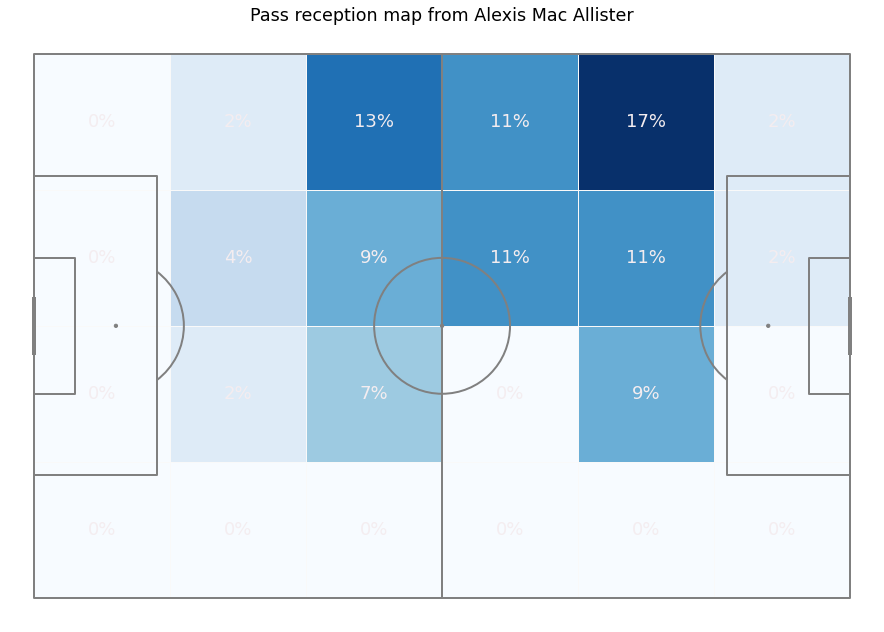

In [140]:
def recepciones_mapa(player):

    player=player
    #Filtrando los pases solo del jugador seleccionado
    recep=final22[(final22["pass_recipient"]==player)&(final22['pass_outcome'].isnull())]
    recep[['pass_end_x', 'pass_end_y']] = recep['pass_end_location'].apply(pd.Series)
    #dibujando el campo de fútbol
    pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='grey',line_zorder=2)

    fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
    fig.set_facecolor('white')
    pitch.scatter(x = recep['pass_end_x'], y = recep['pass_end_y'], ax=ax,s=300,c='skyblue')
    
    bin_x = np.linspace(pitch.dim.left, pitch.dim.right, num=7)
    bin_y = np.sort(np.array([pitch.dim.bottom, pitch.dim.six_yard_bottom,
                              pitch.dim.six_yard_top, pitch.dim.top]))
    bin_statistic = pitch.bin_statistic(recep.pass_end_x, recep.pass_end_y, statistic='count', bins=(6,4), normalize=True)
    pitch.heatmap(bin_statistic, ax=ax, cmap='Blues', edgecolor='#f9f9f9')
    labels2 = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                                  ax=ax, ha='center', va='center',
                                  str_format='{:.0%}')
    
    ax_title = ax.set_title('Pass reception map from ' f'{player}', fontsize=17.5,color='black')
    plt.show()
recepciones_mapa('Alexis Mac Allister')

### Dribbling

In [43]:
final22[final22['dribble_outcome'].notnull()].value_counts('player')

player
Kylian Mbappé          11
Ángel Di María          8
Kingsley Coman          4
Marcus Thuram           4
Randal Kolo Muani       4
Rodrigo De Paul         4
Lionel Messi            3
Aurélien Tchouaméni     2
Eduardo Camavinga       2
Jules Koundé            2
Marcos Acuña            2
Theo Hernández          2
Alexis Mac Allister     2
Enzo Fernandez          1
Gonzalo Montiel         1
Antoine Griezmann       1
Ousmane Dembélé         1
Name: count, dtype: int64

In [44]:
final22[(final22['type']=='Pressure')].value_counts('player')

player
Enzo Fernandez              30
Randal Kolo Muani           29
Julián Álvarez              27
Adrien Rabiot               20
Jules Koundé                20
Marcus Thuram               20
Nicolás Tagliafico          19
Lionel Messi                17
Kingsley Coman              17
Aurélien Tchouaméni         14
Cristian Romero             13
Antoine Griezmann           13
Nahuel Molina Lucero        12
Dayotchanculle Upamecano    11
Rodrigo De Paul             11
Eduardo Camavinga           10
Marcos Acuña                10
Kylian Mbappé                9
Alexis Mac Allister          7
Olivier Giroud               7
Ousmane Dembélé              7
Theo Hernández               6
Youssouf Fofana              5
Raphaël Varane               5
Leandro Paredes              5
Gonzalo Montiel              5
Ángel Di María               5
Nicolás Otamendi             4
Lautaro Martínez             2
Ibrahima Konaté              1
Name: count, dtype: int64

In [45]:
dribbling = argentina_francia[argentina_francia['type']=='Dribble']
dribbling_argentina=dribbling[(dribbling["team"]=='Argentina')]
dribbling_francia = dribbling[(dribbling["team"]=='France')]

In [46]:
dribbling_argentina['dribble_outcome'].value_counts()

dribble_outcome
Incomplete    12
Complete       9
Name: count, dtype: int64

In [47]:
# Dribbling accuracy
dribbling_totales = dribbling_argentina.groupby(['player'])['player'].count().to_frame()
dribbling_completos = dribbling_argentina[dribbling_argentina['dribble_outcome']=='Complete']
dribbling_incompletos = dribbling_argentina[dribbling_argentina['dribble_outcome']=='Incomplete']

dribbling_totales['completos'] = dribbling_completos.groupby(['player'])['player'].count().to_frame()
dribbling_totales['incompletos'] = dribbling_incompletos.groupby(['player'])['player'].count().to_frame()
dribbling_totales = dribbling_totales.fillna(0)

dribbling_totales = dribbling_totales.rename(columns={'player' : 'totales'})
dribbling_totales['Porcentaje %'] = dribbling_totales['completos']/dribbling_totales['totales']*100
dribbling_totales = dribbling_totales.reset_index()
dribbling_totales.sort_values('Porcentaje %',ascending=False)

,player,totales,completos,incompletos,Porcentaje %
0,Alexis Mac Allister,2,2.0,0.0,100.0
1,Enzo Fernandez,1,1.0,0.0,100.0
6,Ángel Di María,8,5.0,3.0,62.5
5,Rodrigo De Paul,4,1.0,3.0,25.0
2,Gonzalo Montiel,1,0.0,1.0,0.0
3,Lionel Messi,3,0.0,3.0,0.0
4,Marcos Acuña,2,0.0,2.0,0.0


### Under pressure actions

In [48]:
up = final22[(final22['under_pressure'].notnull())].value_counts('player').to_frame()
up = up.rename(columns={0 : 'under_pressure'})
up = up.reset_index()
up.head(8)

,player,count
0,Randal Kolo Muani,51
1,Lionel Messi,46
2,Rodrigo De Paul,44
3,Ángel Di María,41
4,Aurélien Tchouaméni,41
5,Marcus Thuram,41
6,Alexis Mac Allister,38
7,Enzo Fernandez,38


In [49]:
up_amc = final22[(final22['under_pressure'].notnull())&(final22['player']=='Alexis Mac Allister')]
up_amc = up_amc.value_counts('type').to_frame()
up_amc = up_amc.rename(columns={0 : 'count'})
up_amc = up_amc.reset_index()
up_amc

,type,count
0,Carry,19
1,Duel,5
2,Dispossessed,3
3,Foul Won,3
4,Ball Receipt*,2
5,Dribble,2
6,Pass,2
7,50/50,1
8,Clearance,1


## Datasets for further visualization

In [50]:
pases_totales_u3['completos']=pases_totales_u3['completos'].astype(int)
pases_totales_u3['incompletos']=pases_totales_u3['incompletos'].astype(int)
pases_totales_u3

,player,pases totales,completos,incompletos,Porcentaje %
0,Alexis Mac Allister,22,19,3,86.363636
1,Enzo Fernandez,23,16,7,69.565217
2,Julián Álvarez,17,13,4,76.470588
3,Lionel Messi,38,29,9,76.315789
4,Marcos Acuña,16,10,6,62.500000
5,Nahuel Molina Lucero,17,9,8,52.941176
6,Nicolás Tagliafico,20,13,7,65.000000
7,Rodrigo De Paul,19,12,7,63.157895
8,Ángel Di María,15,12,3,80.000000


In [51]:
pases_totales_fr_u3['completos']=pases_totales_fr_u3['completos'].astype(int)
pases_totales_fr_u3['incompletos']=pases_totales_fr_u3['incompletos'].astype(int)
pases_totales_fr_u3

,player,pases totales,completos,incompletos,Porcentaje %
0,Adrien Rabiot,16,12,4,75.000000
1,Antoine Griezmann,13,8,5,61.538462
2,Aurélien Tchouaméni,15,9,6,60.000000
3,Dayotchanculle Upamecano,11,2,9,18.181818
4,Hugo Lloris,11,2,9,18.181818
5,Jules Koundé,13,9,4,69.230769
6,Kingsley Coman,7,0,7,0.000000
7,Kylian Mbappé,19,12,7,63.157895
8,Marcus Thuram,9,4,5,44.444444
9,Randal Kolo Muani,9,7,2,77.777778


In [52]:
pases_totales['completos']=pases_totales['completos'].astype(int)
pases_totales['incompletos']=pases_totales['incompletos'].astype(int)
pases_totales

,player,pases totales,completos,incompletos,Porcentaje %
0,Alexis Mac Allister,52,45,7,86.538462
1,Cristian Romero,71,60,11,84.507042
2,Emiliano Martínez,33,18,15,54.545455
3,Enzo Fernandez,94,79,15,84.042553
5,Gonzalo Montiel,13,8,5,61.538462
6,Julián Álvarez,32,26,6,81.250000
8,Leandro Paredes,15,15,0,100.000000
9,Lionel Messi,60,49,11,81.666667
10,Marcos Acuña,28,19,9,67.857143
11,Nahuel Molina Lucero,56,39,17,69.642857


In [53]:
recuperaciones.to_csv('recuperaciones.csv')
bloqueos.to_csv('bloqueos.csv')
up.to_csv('under_pressure.csv')
up_amc.to_csv('under_pressure_amc.csv')
dribbling_totales.to_csv('dribbling.csv')
fouls_won.to_csv('faltas_ganadas.csv')
pases_totales_u3.to_csv('pases_arg_ult3.csv')
pases_totales_fr_u3.to_csv('pases_fra_ult3.csv')
pases_totales.to_csv('pases_totales_arg.csv')

In [54]:
arg = pd.DataFrame({'player':final22[(final22['team']=='Argentina')&(final22['player'].notnull())]['player'].unique()})
arg.to_csv('jugadores_arg.csv')
fra = pd.DataFrame({'player':final22[(final22['team']=='France')&(final22['player'].notnull())]['player'].unique()})
fra.to_csv('jugadores_fra.csv')

## Mac Allister vs Griezmann

In [55]:
# Mac Allister
metricas = ['Pases completados','Pases completados último 1/3','Bloqueos','Recuperaciones','Faltas ganadas','Dribbles completados',
           'Tiros al arco','xG','Recepciones','Duelos ganados']
mac_allister = [45,19,6,9,3,2,1,0.054379339,46,8]

In [56]:
#Griezmann
griezmann = [21,8,1,1,1,0,0,0,23,6]

In [57]:
amc_vs_grz = pd.DataFrame({'metrica':metricas,'Alexis Mac Allister':mac_allister,'Antoine Griezmann':griezmann})
amc_vs_grz=np.transpose(amc_vs_grz)

In [58]:
amc_vs_grz

,0,1,2,3,4,5,6,7,8,9
metrica,Pases completados,Pases completados último 1/3,Bloqueos,Recuperaciones,Faltas ganadas,Dribbles completados,Tiros al arco,xG,Recepciones,Duelos ganados
Alexis Mac Allister,45.0,19.0,6.0,9.0,3.0,2.0,1.0,0.054379,46.0,8.0
Antoine Griezmann,21,8,1,1,1,0,0,0,23,6


In [59]:
amc_vs_grz.columns = amc_vs_grz.iloc[0]

In [60]:
amc_vs_grz=amc_vs_grz.drop(['metrica'])

In [61]:
for i in list(amc_vs_grz.columns):
    amc_vs_grz[i]=amc_vs_grz[i].astype(float)

In [62]:
amc_vs_grz

metrica,Pases completados,Pases completados último 1/3,Bloqueos,Recuperaciones,Faltas ganadas,Dribbles completados,Tiros al arco,xG,Recepciones,Duelos ganados
Alexis Mac Allister,45.0,19.0,6.0,9.0,3.0,2.0,1.0,0.054379,46.0,8.0
Antoine Griezmann,21.0,8.0,1.0,1.0,1.0,0.0,0.0,0.000000,23.0,6.0


In [63]:
alexis = list(amc_vs_grz.iloc[0])
griezmann = list(amc_vs_grz.iloc[1])

In [64]:
len(griezmann)

10

In [65]:
amc_vs_grz.columns

Index(['Pases completados', 'Pases completados último 1/3', 'Bloqueos',
       'Recuperaciones', 'Faltas ganadas', 'Dribbles completados',
       'Tiros al arco', 'xG', 'Recepciones', 'Duelos ganados'],
      dtype='object', name='metrica')

In [66]:
alexis

[45.0, 19.0, 6.0, 9.0, 3.0, 2.0, 1.0, 0.054379339, 46.0, 8.0]

In [67]:
from mplsoccer import Radar, FontManager, grid
import matplotlib.pyplot as plt
params = list(amc_vs_grz.columns)
high = [90,25,8,10,6,5,2,0.08,80,12]
low = [0 for i in range(len(alexis))]

radar = Radar(params, low, high,
              round_int=[False]*len(params),
              num_rings=4, 
              ring_width=1, center_circle_radius=1)

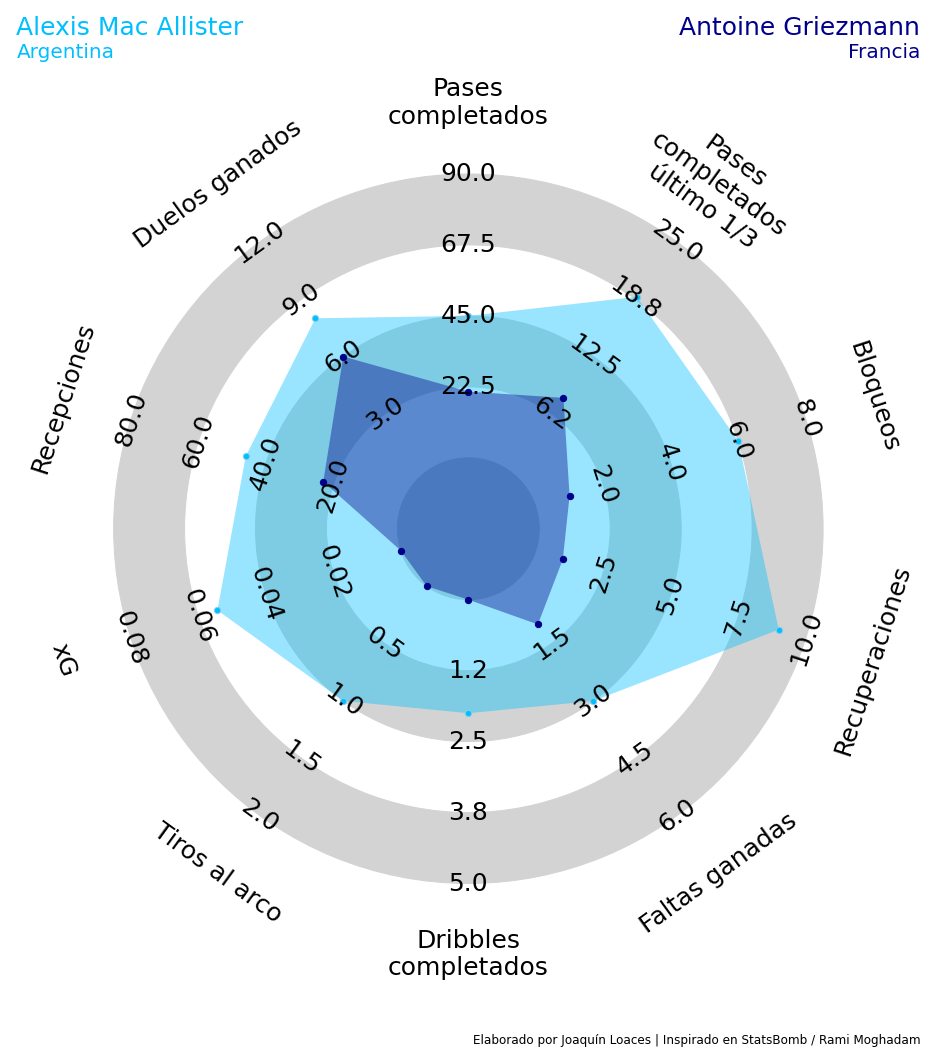

In [68]:
# creating the figure using the grid function from mplsoccer:
fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

# plot radar
radar.setup_axis(ax=axs['radar'])  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='lightgrey', edgecolor='lightgrey')
radar_output = radar.draw_radar_compare(alexis, griezmann, ax=axs['radar'],
                                        kwargs_radar={'facecolor': 'deepskyblue', 'alpha': 0.4},
                                        kwargs_compare={'facecolor': 'darkblue', 'alpha': 0.4})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=25)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25)
axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                     c='deepskyblue', edgecolors='skyblue', marker='o', s=40, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                     c='darkblue', edgecolors='darkblue', marker='o', s=40, zorder=2)

# adding the endnote and title text (these axes range from 0-1, i.e. 0, 0 is the bottom left)
# Note we are slightly offsetting the text from the edges by 0.01 (1%, e.g. 0.99)
endnote_text = axs['endnote'].text(0.99, -1, 'Elaborado por Joaquín Loaces | Inspirado en StatsBomb / Rami Moghadam', fontsize=12, ha='right', va='center')
title1_text = axs['title'].text(0.01, 0.65, 'Alexis Mac Allister', fontsize=25, color='deepskyblue', ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, 'Argentina', fontsize=20,
                                ha='left', va='center', color='deepskyblue')
title3_text = axs['title'].text(0.99, 0.65, 'Antoine Griezmann', fontsize=25,
                                ha='right', va='center', color='darkblue')
title4_text = axs['title'].text(0.99, 0.25, 'Francia', fontsize=20,
                                ha='right', va='center', color='darkblue')